<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [19]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [11]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [12]:
boston_df.head(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


# Project Case Scenario

<b> Project Scenario: </b> You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? 

Upper management will like to get some insight into the following:

* <b> Is there a significant difference in the median value of houses bounded by the Charles river or not?

* <b> Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

* <b> Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

* <b> What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes? 

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic.

Details regarding the project will be broken down in the next reading sections.

## Task 1: Become familiar with the dataset

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

## Task 2: Generate Descriptive Statistics and Visualizations

#### Task 2.1: For the "Median value of owner-occupied homes" provide a boxplot

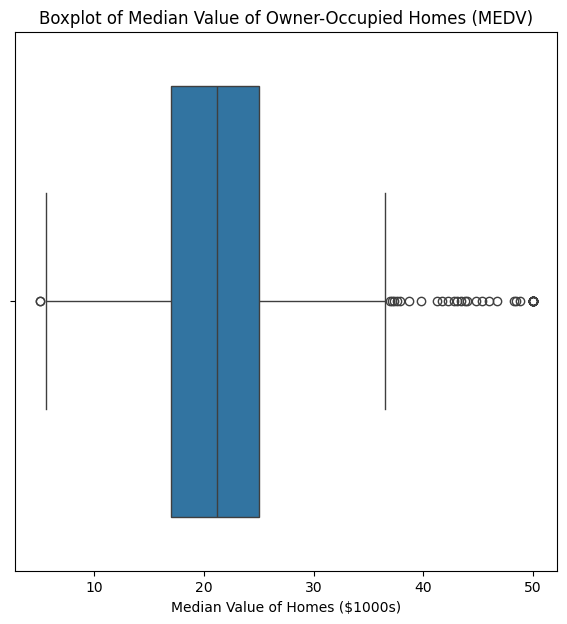

In [30]:
# Boxplot for the Median Value of owner-occupied homes (MEDV)
plt.figure(figsize=(7,7))
sns.boxplot(x=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.xlabel('Median Value of Homes ($1000s)')
plt.show()

#### Task 2.2: Provide a  bar plot for the Charles river variable

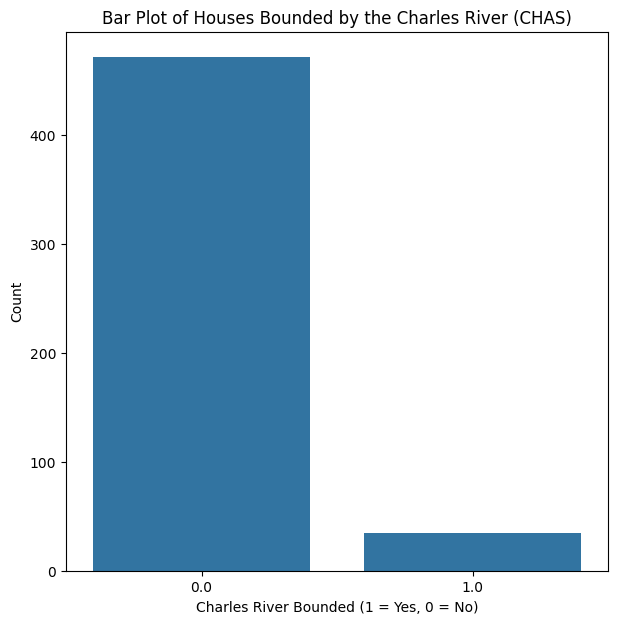

In [31]:
# Bar plot for the Charles River variable (CHAS)
plt.figure(figsize=(7,7))
sns.countplot(x='CHAS', data=boston_df)
plt.title('Bar Plot of Houses Bounded by the Charles River (CHAS)')
plt.xlabel('Charles River Bounded (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

#### Task 2.3: Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

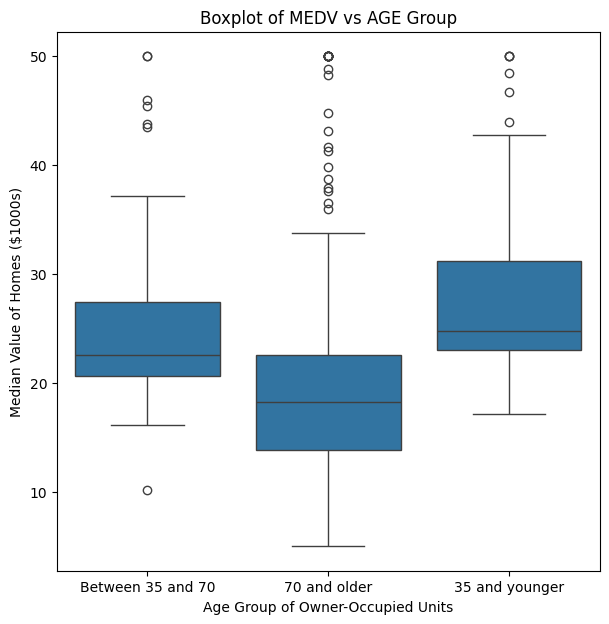

In [32]:
# Discretizing AGE into three groups
boston_df.loc[boston_df['AGE'] <= 35, 'Age_Group'] = "35 and younger"
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_Group'] = "Between 35 and 70"
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = "70 and older"

# Boxplot for MEDV vs discretized AGE
plt.figure(figsize=(7,7))
sns.boxplot(x='Age_Group', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV vs AGE Group')
plt.xlabel('Age Group of Owner-Occupied Units')
plt.ylabel('Median Value of Homes ($1000s)')
plt.show()


### Task 2.4: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

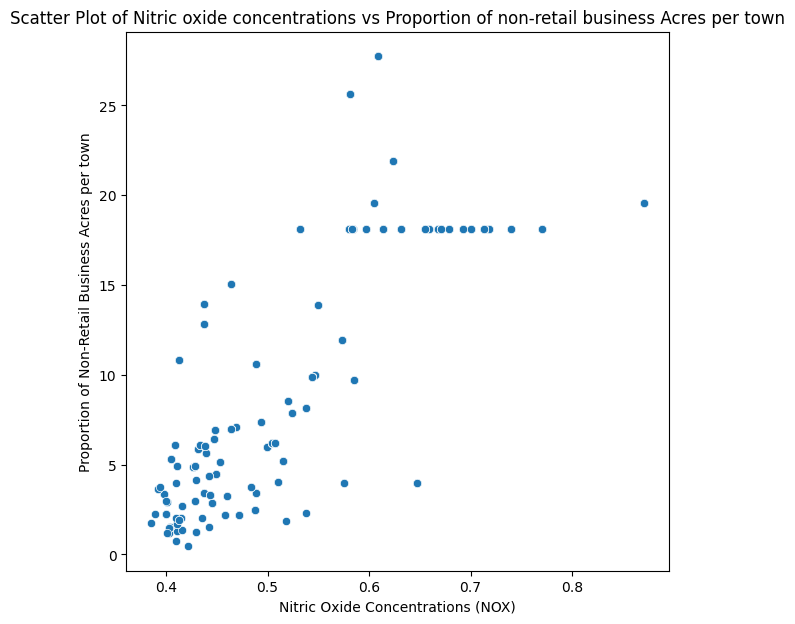

In [33]:
# Scatter plot for NOX vs INDUS
plt.figure(figsize=(7,7))
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Scatter Plot of Nitric oxide concentrations vs Proportion of non-retail business Acres per town')
plt.xlabel('Nitric Oxide Concentrations (NOX)')
plt.ylabel('Proportion of Non-Retail Business Acres per town')
plt.show()

#### Task 2.5: Create a histogram for the pupil to teacher ratio variable

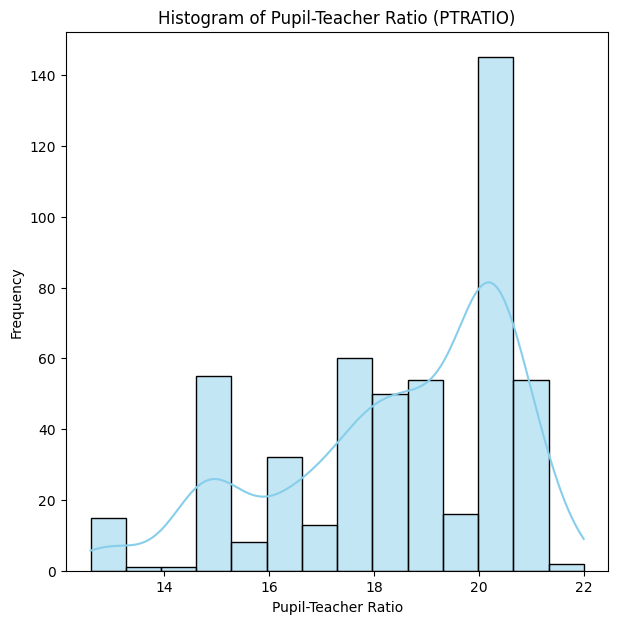

In [42]:
# Histogram for the pupil to teacher ratio variable
plt.figure(figsize=(7,7))
sns.histplot(boston_df['PTRATIO'], kde=True, color='skyblue')
plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

## Task 3: Use the appropriate tests to answer the questions provided.

#### Task3.1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

State the Hypotheses:

H0 = there is no significant difference in the median value of houses bounded by the Charles river

H1 = there is a significant difference in the median value of houses bounded by the Charles river

In [44]:
# T-test for independent samples (CHAS vs MEDV)
from scipy import stats

# Separate data by CHAS
bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform t-test
t_stat, p_value = stats.ttest_ind(bounded, not_bounded)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Hypothesis testing conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference in median values.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

T-statistic: 3.996437466090509, P-value: 7.390623170519905e-05
Reject the null hypothesis: Significant difference in median values.


<u> Conclusion: Given the p-value is less than 0.05, we reject the Null Hypothesis, meaning there is no significant difference in the median value between the houses near and from from Charles River

#### Task 3.2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the Hypotheses:

H0 = there is no difference in the median value of houses for each proportion of occupied units built prior to 1940

H1 =  there is a difference in the median value of houses for each proportion of occupied units built prior to 1940

In [45]:
boston_df.loc[boston_df['AGE'] <= 35, 'Age_Group'] = "35 and younger"
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_Group'] = "Between 35 and 70"
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = "70 and older"

First, divide the data into three separate variables, one for each age category.

In [46]:
thirtyfive_lower = boston_df[boston_df['Age_Group'] == "35 and younger"]['MEDV']
thirtyfive_seventy = boston_df[boston_df['Age_Group'] == "Between 35 and 70"]['MEDV']
seventy_older = boston_df[boston_df['Age_Group'] == "70 and older"]['MEDV']

Second, Run a one-way ANOVA

In [47]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))


# Hypothesis testing conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference in MEDV between AGE groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in MEDV.")

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15
Reject the null hypothesis: Significant difference in MEDV between AGE groups.


<u> 
Since the p-value is smaller than 0.05, we reject the null hypothesis and conclude that the median house values differ for each proportion of occupied units built before 1940.

#### Task 3.3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the Hyptheses:

H0: Nitric Oxide concentration is not correlated with the proportion of non-retail business acres per town

H1: Nitric Oxide concentration is correlated with the proportion of non-retail business acres per town

In [48]:
# Pearson Correlation for NOX and INDUS
correlation, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Pearson Correlation: {correlation}, P-value: {p_value}")

# Hypothesis testing conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: Significant correlation between NOX and INDUS.")
else:
    print("Fail to reject the null hypothesis: No significant correlation.")

Pearson Correlation: 0.7636514469209192, P-value: 7.913361061210442e-98
Reject the null hypothesis: Significant correlation between NOX and INDUS.


<u> Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a relationship between nitric oxide concentrations and the proportion of non-retail business acres per town.

#### Task 3.4: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

State the Hypotheses:

H0: Additional weighted distance to the five Boston employment centres has no impact on the median value of owner occupied homes

H1: Additional weighted distance to the five Boston employment centres has an impact on the median value of owner occupied homes

In [49]:
# Linear regression 
import statsmodels.api as sm

# Define the independent and dependent variables
X = boston_df['DIS']
y = boston_df['MEDV']

# Add constant to the model
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 27 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        17:35:59   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

<u> Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there is evidence showing an impact on the median value of owner-occupied homes.